## Data Cleaning IRL Data

In [1]:
#import  os libraries. Also importing warnings to disbale Python warning messages
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
files_list =os.listdir('.')
files_list

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'Average price 1970 -2001.csv',
 'Average price 2001-2011.csv',
 'Average price 2011-2022.csv',
 'CA2.ipynb',
 'Continues_Assignment_2_Zdenko_Zahorec_sbs22090_MSc in Data Analytics (SB+) - Feb 2022 - 2022 - YR1.docx',
 'Download links.txt',
 'tweets_organic_food ireland.csv',
 'Unlimited tweets.ipynb',
 'Unused code.ipynb',
 'US Steak prices.csv',
 'US Steak prices.xlsx',
 '_Twitter API.ipynb',
 '~$US Steak prices.xlsx']

In [3]:
#seting columns dispay option to 'max'- to see all columns in dataset
pd.set_option('display.max.columns', None)
df_irl1= pd.read_csv(r'Average price 1970 -2001.csv')
print(df_irl1.head())
df_irl2= pd.read_csv(r'Average price 2001-2011.csv')
print(df_irl2.head())
df_irl3= pd.read_csv(r'Average price 2011-2022.csv')
print(df_irl3.head())

  STATISTIC              Statistic2  TLIST(M1)    Month  C02438V02948  \
0     CPM08  National Average Price     199701  1997M01         10010   
1     CPM08  National Average Price     199701  1997M01         10020   
2     CPM08  National Average Price     199701  1997M01         10030   
3     CPM08  National Average Price     199701  1997M01         10040   
4     CPM08  National Average Price     199701  1997M01         10050   

                 Consumer Item UNIT  VALUE  
0          Round steak per kg.  IEP  6.119  
1        Sirloin steak per kg.  IEP  8.053  
2            Rib steak per kg.  IEP  4.023  
3  Leg beef (boneless) per kg.  IEP  4.269  
4    Brisket pot roast per kg.  IEP  4.097  
  STATISTIC                Statistic  TLIST(M1)    Month  C02363V02844  \
0     CPM04  National Average  Price     200112  2001M12         10010   
1     CPM04  National Average  Price     200112  2001M12         10020   
2     CPM04  National Average  Price     200112  2001M12         1003

In [4]:
dfs = [df_irl1,df_irl2,df_irl3]
def steaks(lists):
    column_1=lists.drop_duplicates(subset = ['Consumer Item'])
    column_1=column_1[column_1['Consumer Item'].str.contains('steak')] 
    column_1 = column_1['Consumer Item']
    print(column_1)
for lists in dfs:
    steaks(lists)


0       Round steak per kg.
1     Sirloin steak per kg.
2         Rib steak per kg.
13       Pork steak per kg.
Name: Consumer Item, dtype: object
0         Round steak per kg.
1       Sirloin steak per kg.
2     Striploin steak per kg.
12         Pork steak per kg.
21       Salmon steak per kg.
Name: Consumer Item, dtype: object
5       Sirloin steak per kg
6     Striploin steak per kg
10         Pork steak per kg
Name: Consumer Item, dtype: object


In [5]:
df_irl3['Consumer Item'] = df_irl3['Consumer Item'].replace(['Sirloin steak per kg'],'Sirloin steak per kg.')
lst=[]
for lists in dfs:
    lists=lists.rename(columns = {'Consumer Item':'SteakType','TLIST(M1)':'Daystamp'})
    lists=lists.loc[(lists.SteakType.str.contains('Sirloin'))]  
    lists = lists.pivot_table('VALUE', ['Daystamp'], 'SteakType')
    lists= lists.rename_axis('ID',axis=1)
    lists= lists.reset_index()
    lst.append(lists)
df_irl = pd.concat(lst, axis=0, ignore_index=True)
df_irl.head()

ID,Daystamp,Sirloin steak per kg.
0,199701,8.053
1,199702,8.276
2,199703,8.124
3,199704,8.503
4,199705,8.397


In [6]:
df_irl['Daystamp'] = pd.to_datetime(df_irl['Daystamp'].apply(str) + '01', format='%Y%m%d', errors='ignore')
df_irl['Year']= df_irl['Daystamp'].dt.year
df_irl['Month']= df_irl['Daystamp'].dt.month
df_irl.head()

ID,Daystamp,Sirloin steak per kg.,Year,Month
0,1997-01-01,8.053,1997,1
1,1997-02-01,8.276,1997,2
2,1997-03-01,8.124,1997,3
3,1997-04-01,8.503,1997,4
4,1997-05-01,8.397,1997,5


In [7]:
df_irl['Sirloin steak per kg.'].describe()

count    302.000000
mean      13.366103
std        2.598164
min        7.994000
25%       12.217250
50%       14.187500
75%       15.466500
max       16.982000
Name: Sirloin steak per kg., dtype: float64

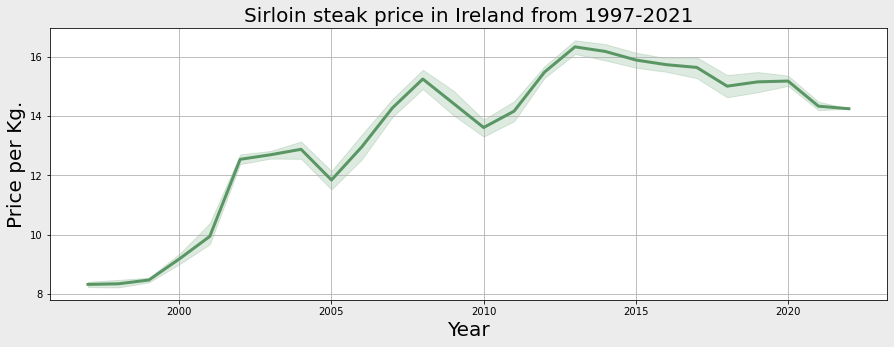

In [8]:
# importing seaborn module
import seaborn as sns
import matplotlib.pyplot as plt
#enhance line plot
plt.figure(figsize=(15,5),facecolor='#ECECEC')
Time_series=sns.lineplot(x=df_irl['Year'],y='Sirloin steak per kg.',data=df_irl,color='#599664', linewidth=3)
Time_series.set_title('Sirloin steak price in Ireland from 1997-2021',fontsize=20)
Time_series.set_ylabel('Price per Kg.',fontsize=20)
Time_series.set_xlabel('Year',fontsize=20)
plt.grid() 


In [9]:
df_irl

ID,Daystamp,Sirloin steak per kg.,Year,Month
0,1997-01-01,8.053,1997,1
1,1997-02-01,8.276,1997,2
2,1997-03-01,8.124,1997,3
3,1997-04-01,8.503,1997,4
4,1997-05-01,8.397,1997,5
...,...,...,...,...
297,2021-10-01,14.209,2021,10
298,2021-11-01,14.209,2021,11
299,2021-12-01,14.258,2021,12
300,2022-01-01,14.258,2022,1


## Data Cleaning US Data

In [10]:
df_usa= pd.read_csv(r'US Steak prices.csv')
df_usa.head(20)

,"CPI Average Price Data, U.S. city average (AP)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Original Data Value,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,APU0000703613,NaN,NaN,NaN,NaN
3,Series Title:,"Steak, sirloin, USDA Choice, boneless, per lb....",NaN,NaN,NaN,NaN
4,Area:,U.S. city average,NaN,NaN,NaN,NaN
5,Item:,"Steak, sirloin, USDA Choice, boneless, per lb....",NaN,NaN,NaN,NaN
6,Years:,1989 to 2022,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,Series ID,Year,Period,Value,NaN,NaN
9,APU0000703613,1989,M01,3.854,NaN,NaN


In [11]:
df_usa= pd.read_csv(r'US Steak prices.csv',skiprows=9)
df_usa['Period']=df_usa['Period'].str[1:]
df_usa['Year']=df_usa['Year'].astype(str) + df_usa["Period"]
df_usa =df_usa.drop(['Series ID', 'Unnamed: 4','Unnamed: 5','Period'], axis=1)
df_usa=df_usa.rename(columns = {'Year':'Daystamp'})
df_usa= df_usa.rename_axis('ID',axis=1)
df_usa.head()

ID,Daystamp,Value
0,198901,3.854
1,198902,3.948
2,198903,3.934
3,198904,3.888
4,198905,4.015


In [12]:

df_usa['Daystamp'] = pd.to_datetime(df_usa['Daystamp'].apply(str) + '01', format='%Y%m%d', errors='ignore')
df_usa['Year']= df_usa['Daystamp'].dt.year
df_usa['Month']= df_usa['Daystamp'].dt.month
df_usa

ID,Daystamp,Value,Year,Month
0,1989-01-01,3.854,1989,1
1,1989-02-01,3.948,1989,2
2,1989-03-01,3.934,1989,3
3,1989-04-01,3.888,1989,4
4,1989-05-01,4.015,1989,5
...,...,...,...,...
394,2021-11-01,11.508,2021,11
395,2021-12-01,11.055,2021,12
396,2022-01-01,10.826,2022,1
397,2022-02-01,10.584,2022,2


In [13]:
df_usa=df_usa.rename(columns = {'Value':'Sirloin steak per kg.'})
df_usa['Sirloin steak per kg.']=2.2* df_usa['Sirloin steak per kg.']
df_usa

ID,Daystamp,Sirloin steak per kg.,Year,Month
0,1989-01-01,8.4788,1989,1
1,1989-02-01,8.6856,1989,2
2,1989-03-01,8.6548,1989,3
3,1989-04-01,8.5536,1989,4
4,1989-05-01,8.8330,1989,5
...,...,...,...,...
394,2021-11-01,25.3176,2021,11
395,2021-12-01,24.3210,2021,12
396,2022-01-01,23.8172,2022,1
397,2022-02-01,23.2848,2022,2


In [14]:
df_usa = df_usa[(df_usa['Daystamp'] > '1996-12-1') & (df_usa['Daystamp'] <= '2022-2-1')]
print(df_usa.info())
df_irl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 96 to 397
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Daystamp               302 non-null    datetime64[ns]
 1   Sirloin steak per kg.  302 non-null    float64       
 2   Year                   302 non-null    int64         
 3   Month                  302 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 11.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Daystamp               302 non-null    datetime64[ns]
 1   Sirloin steak per kg.  302 non-null    float64       
 2   Year                   302 non-null    int64         
 3   Month                  302 non-null    int64         
dtypes: 

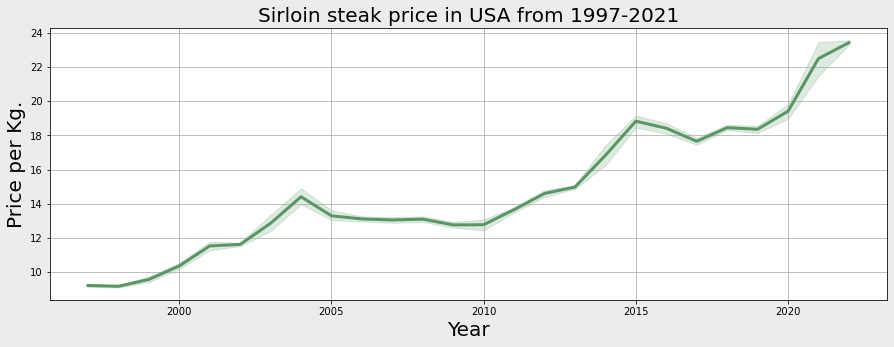

In [29]:
#enhance line plot
plt.figure(figsize=(15,5),facecolor='#ECECEC')
Time_series=sns.lineplot(x=df_usa['Year'],y='Sirloin steak per kg.',data=df_usa,color='#599664', linewidth=3)
Time_series.set_title('Sirloin steak price in USA from 1997-2021',fontsize=20)
Time_series.set_ylabel('Price per Kg.',fontsize=20)
Time_series.set_xlabel('Year',fontsize=20)
plt.grid() 

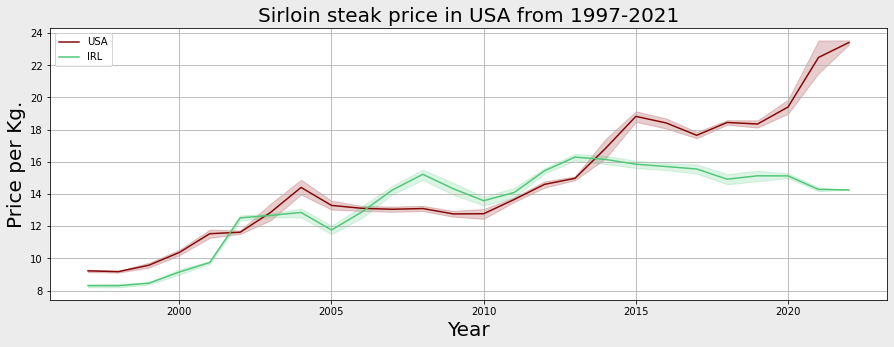

In [32]:
#compare fwo graphs
plt.figure(figsize=(15,5),facecolor='#ECECEC')
Time_series=sns.lineplot(x=df_usa['Year'],y='Sirloin steak per kg.',data=df_usa,color='#880808', linewidth=1.5,label='USA')
Time_series=sns.lineplot(x=df_irl['Year'],y='Sirloin steak per kg.',data=df_irl,color='#50C878', linewidth=1.5, label='IRL')
Time_series.set_title('Sirloin steak price in USA from 1997-2021',fontsize=20)
Time_series.set_ylabel('Price per Kg.',fontsize=20)
Time_series.set_xlabel('Year',fontsize=20)
plt.grid() 


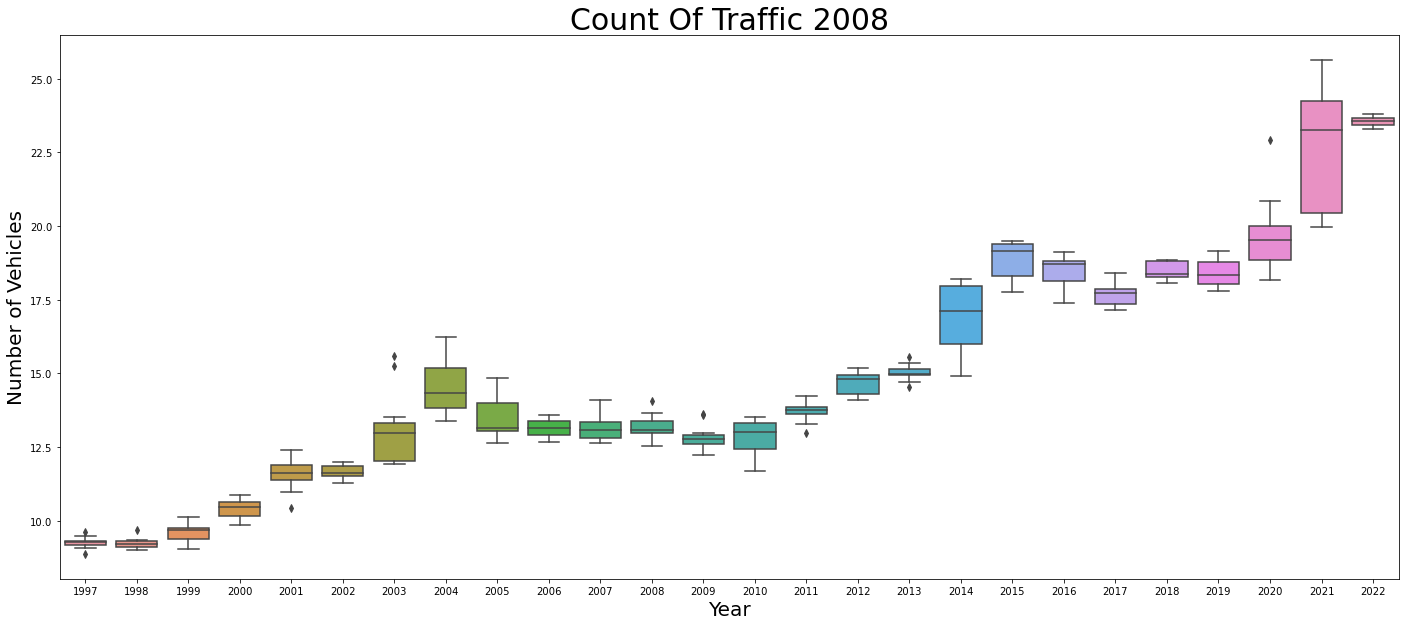

In [17]:
plt.figure(figsize=(24, 10))
axs=sns.boxplot(x=df_usa.Year, y=df_usa['Sirloin steak per kg.'])
axs.set_title('Count Of Traffic 2008',fontsize=30)
axs.set_ylabel('Number of Vehicles',fontsize=20)
axs.set_xlabel('Year',fontsize=20)
plt.show()

In [18]:
grp = df_usa.groupby('Year')['Sirloin steak per kg.']
df_usa['Sirloin steak per kg.'] = (df_usa['Sirloin steak per kg.'].where(grp.transform('quantile', q=0.95) > df_usa['Sirloin steak per kg.'], 
                            grp.transform('median')))


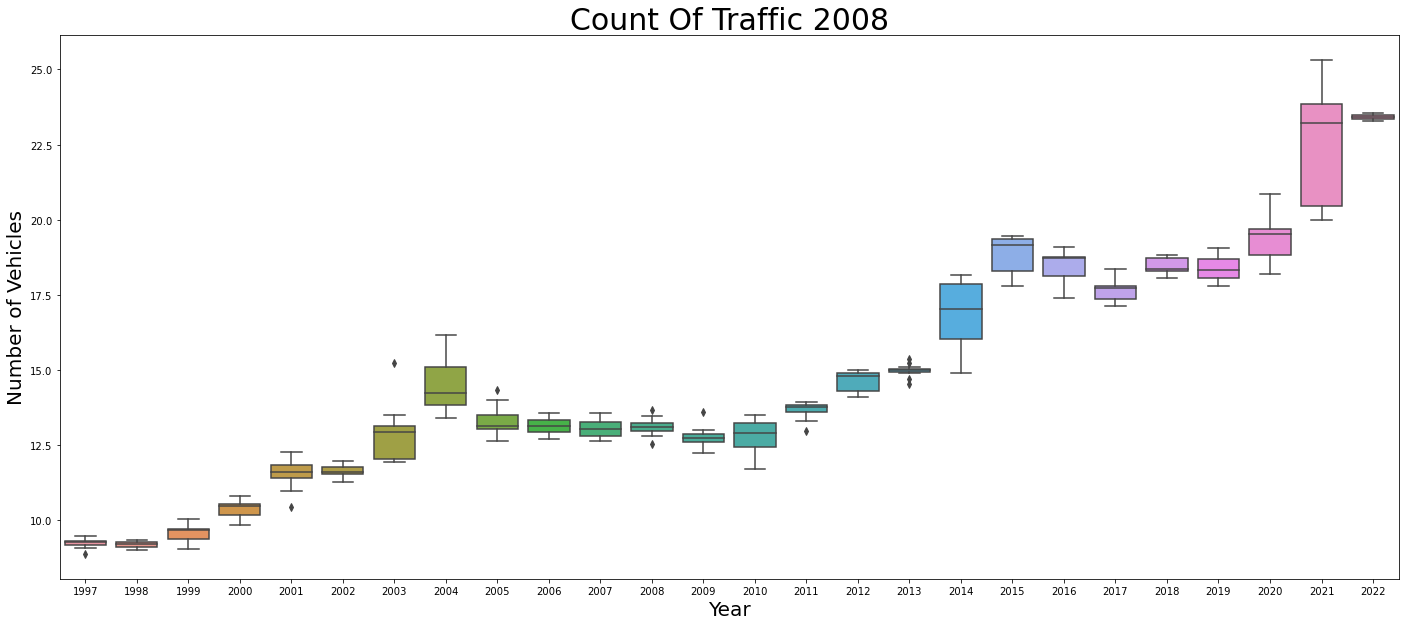

In [19]:
plt.figure(figsize=(24, 10))
axs=sns.boxplot(x=df_usa.Year, y=df_usa['Sirloin steak per kg.'])
axs.set_title('Count Of Traffic 2008',fontsize=30)
axs.set_ylabel('Number of Vehicles',fontsize=20)
axs.set_xlabel('Year',fontsize=20)
plt.show()

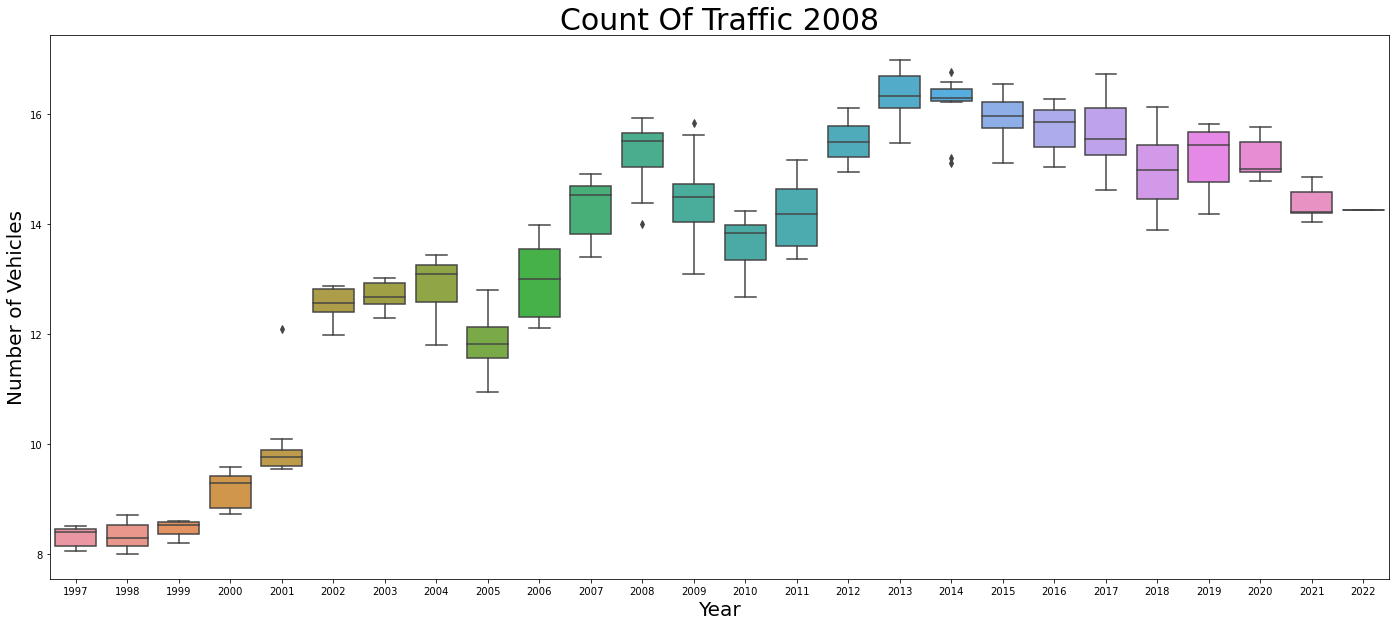

In [20]:
plt.figure(figsize=(24, 10))
axs=sns.boxplot(x=df_irl.Year, y=df_irl['Sirloin steak per kg.'])
axs.set_title('Count Of Traffic 2008',fontsize=30)
axs.set_ylabel('Number of Vehicles',fontsize=20)
axs.set_xlabel('Year',fontsize=20)
plt.show()

In [21]:
grp = df_irl.groupby('Year')['Sirloin steak per kg.']
df_irl['Sirloin steak per kg.'] = (df_irl['Sirloin steak per kg.'].where(grp.transform('quantile', q=0.95) > df_irl['Sirloin steak per kg.'], 
                            grp.transform('median')))


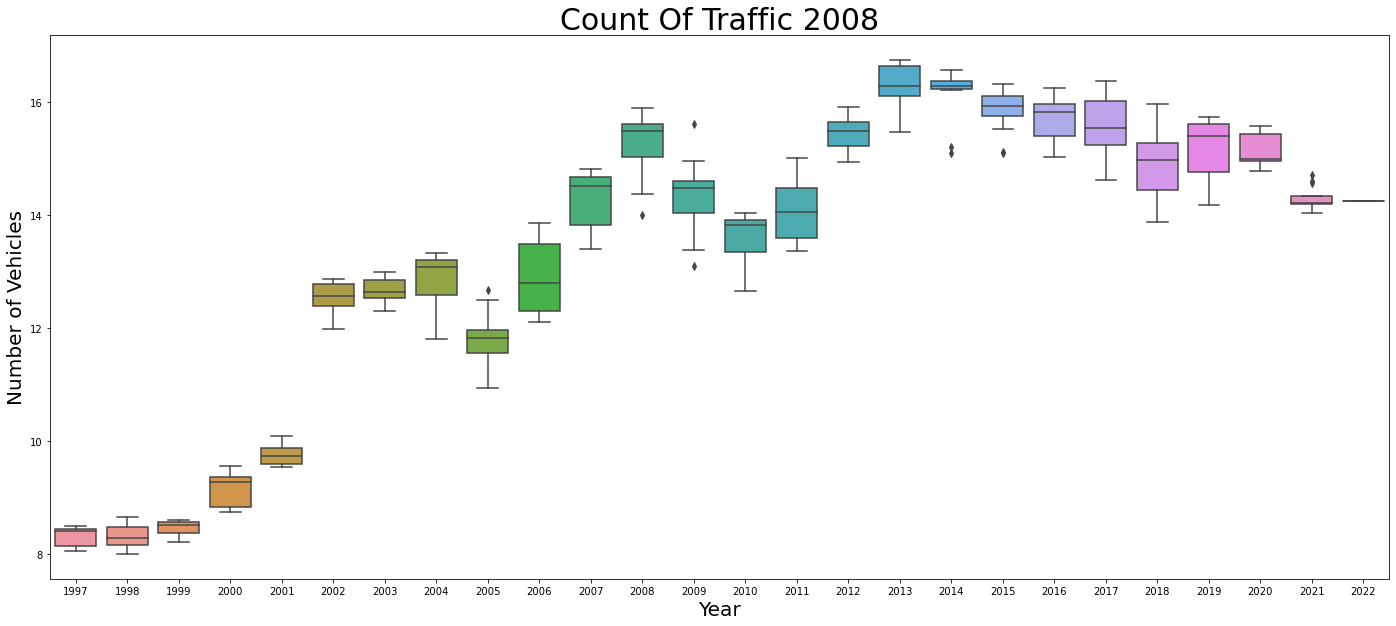

In [22]:
plt.figure(figsize=(24, 10))
axs=sns.boxplot(x=df_irl.Year, y=df_irl['Sirloin steak per kg.'])
axs.set_title('Count Of Traffic 2008',fontsize=30)
axs.set_ylabel('Number of Vehicles',fontsize=20)
axs.set_xlabel('Year',fontsize=20)
plt.show()